<a href="https://colab.research.google.com/github/LOOKatKimhyein/CRM-analysis/blob/main/(2)%EA%B3%A0%EA%B0%9D%EC%B7%A8%ED%96%A5%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 고객 취향 군집화  
: clustering을 위해서는 모두 숫자형 변수로 input되게 만들어줘야한다.  
user_id || 상품1 구매건수 || 상품2 구매건수|| 상품3 구매건수

# 1. 환경 설정

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans

## 2. 데이터 불러오기

In [ ]:
df_org = pd.read_csv('.//2019-Oct_purchase.csv')
df_org.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
3,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
4,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553


In [ ]:
df_org.shape

(742849, 9)

#### 데이터 확인

In [ ]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742849 entries, 0 to 742848
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     742849 non-null  object 
 1   event_type     742849 non-null  object 
 2   product_id     742849 non-null  int64  
 3   category_id    742849 non-null  int64  
 4   category_code  569424 non-null  object 
 5   brand          684544 non-null  object 
 6   price          742849 non-null  float64
 7   user_id        742849 non-null  int64  
 8   user_session   742849 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 51.0+ MB


In [ ]:
df_org['user_id'].nunique()

347118

In [ ]:
df_org['user_session'].nunique()

629560

In [ ]:
df_org['user_session'].isnull().sum()

0

In [ ]:
df_org['user_id'].isnull().sum()

0

#### NA 확인

In [ ]:
df_org.isna().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    173425
brand             58305
price                 0
user_id               0
user_session          0
dtype: int64

In [ ]:
df_org[df_org['category_code'].isna()].head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
11,2019-10-01 02:19:12 UTC,purchase,13103842,2053013553526341921,NaN,pdw,391.26,516178643,4d74b49e-3838-43cc-ac2e-a0490942b464
13,2019-10-01 02:19:59 UTC,purchase,28100119,2053013564918072245,NaN,NaN,153.16,517953667,7954f58c-158d-402d-9820-c502a5eea86d
17,2019-10-01 02:20:28 UTC,purchase,26601440,2053013563517174627,NaN,NaN,91.12,554101070,5a29c401-c05b-4dcf-b9e6-78324875dfd4
20,2019-10-01 02:21:07 UTC,purchase,16500007,2053013556462354899,NaN,omron,62.52,516815266,918c33db-9bb0-41b9-a148-47523330eddd


In [ ]:
df_org[df_org.brand == 'xiaomi']['category_code'].value_counts()
# category_code가 na라면, brand로 추측해서 넣어볼 수 있을듯

electronics.smartphone            38776
electronics.audio.headphone        4762
electronics.clocks                 1135
appliances.environment.vacuum       667
auto.accessories.videoregister      329
kids.skates                         244
appliances.personal.scales          236
computers.notebook                  138
accessories.bag                      83
appliances.kitchen.kettle            64
electronics.tablet                   53
electronics.video.tv                 28
construction.tools.light             26
accessories.umbrella                 14
electronics.camera.video             13
appliances.kitchen.blender           11
computers.peripherals.mouse           9
sport.bicycle                         5
furniture.bedroom.pillow              2
Name: category_code, dtype: int64

In [ ]:
df_org[df_org['brand'].isna()].head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
13,2019-10-01 02:19:59 UTC,purchase,28100119,2053013564918072245,NaN,NaN,153.16,517953667,7954f58c-158d-402d-9820-c502a5eea86d
17,2019-10-01 02:20:28 UTC,purchase,26601440,2053013563517174627,NaN,NaN,91.12,554101070,5a29c401-c05b-4dcf-b9e6-78324875dfd4
21,2019-10-01 02:21:45 UTC,purchase,28100000,2053013564918072245,NaN,NaN,60.49,517953667,7954f58c-158d-402d-9820-c502a5eea86d
29,2019-10-01 02:23:03 UTC,purchase,19100075,2053013556227473861,construction.tools.saw,NaN,120.47,513484630,92bc0a54-4dab-4748-9a39-edbb4c760254
43,2019-10-01 02:26:02 UTC,purchase,34800175,2062461754293617058,NaN,NaN,33.46,512594464,f18609cf-7cab-47cf-aaf8-8622202722bd


In [ ]:
df_org[df_org.category_code == 'construction.tools.saw']['brand'].value_counts()
# category_code가 na라면, brand로 추측해서 넣어볼 수 있을듯

huter       801
stihl       215
eurolux     125
bosch        80
crown        72
makita       42
dewalt       31
alteco       28
p.i.t.       24
carver       15
dwt          15
edon         13
festool      12
dremel        7
stanley       7
patriot       5
total         5
metabo        3
kolner        3
oasis         2
stalker       2
al-ko         2
magnetta      1
ryobi         1
ivt           1
hitachi       1
hyundai       1
Name: brand, dtype: int64

In [ ]:
df_org[(df_org.brand.isna())&(df_org.category_code.isna())].shape

(38388, 9)

In [ ]:
df_na_treat =  df_org.dropna(axis = 0)

In [ ]:
df_na_treat.isna().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

### 데이터 탐색 및 이상치 제거  
[이상치 제거]  
- boxplot으로 IQR * 1.5 + q3 보기  
- 상위 1% 보기  
- 3시그마 확인하기  
> "price" 변수 이상치 의심되지만, 상품카테고리를 사용할 것이기 때문에 굳이 price변수 이상치 제거 x

In [ ]:
df_na_treat.shape

(549507, 9)

In [ ]:
df_na_treat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549507 entries, 0 to 742848
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     549507 non-null  object 
 1   event_type     549507 non-null  object 
 2   product_id     549507 non-null  int64  
 3   category_id    549507 non-null  int64  
 4   category_code  549507 non-null  object 
 5   brand          549507 non-null  object 
 6   price          549507 non-null  float64
 7   user_id        549507 non-null  int64  
 8   user_session   549507 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 41.9+ MB


In [ ]:
df_na_treat.describe()

,product_id,category_id,price,user_id
count,5.495070e+05,5.495070e+05,549507.000000,5.495070e+05
mean,3.054594e+06,2.054518e+18,371.001168,5.363179e+08
std,5.111423e+06,1.258658e+16,370.971646,1.832481e+07
min,1.000978e+06,2.053014e+18,0.880000,3.031604e+08
25%,1.004767e+06,2.053014e+18,131.530000,5.171431e+08
50%,1.005100e+06,2.053014e+18,230.880000,5.365788e+08
75%,3.600937e+06,2.053014e+18,462.440000,5.545513e+08
max,6.050000e+07,2.173217e+18,2574.040000,5.662783e+08


{'whiskers': [<matplotlib.lines.Line2D at 0x20286393730>,
 'caps': [<matplotlib.lines.Line2D at 0x20286393d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x202863932e0>],
 'medians': [<matplotlib.lines.Line2D at 0x202863af4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x202863af880>],
 'means': []}

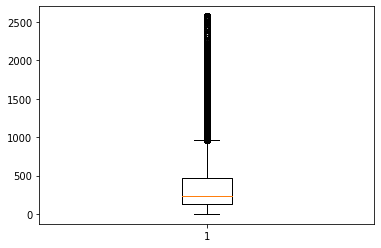

In [ ]:
# 1) boxplot
plt.boxplot(df_na_treat.price)

In [ ]:
IQR = df_na_treat.price.quantile(0.75) - df_na_treat.price.quantile(0.25)

In [ ]:
df_na_treat.price.quantile(0.75)  + IQR*1.5

958.805

In [ ]:
# 상위1%
df_na_treat.price.quantile(0.99) 

1698.87

(-1.0, 500.0)

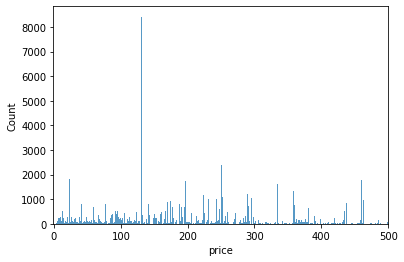

In [ ]:
sns.histplot(df_na_treat['price'],bins = 10000)
plt.xlim(-1,500)

In [ ]:
import gc
gc.collect()

583177

In [ ]:
# 3시그마
print(df_na_treat['price'].mean(), df_na_treat['price'].std())

371.00116784681546 370.9716461127377


#### 'category'변수 확인 및 파생

In [ ]:
df_na_treat.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
3,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f


In [ ]:
df_na_treat['category_code'].value_counts(1)

electronics.smartphone         0.614323
electronics.audio.headphone    0.055393
electronics.video.tv           0.039213
electronics.clocks             0.030294
appliances.kitchen.washer      0.029224
                                 ...   
apparel.skirt                  0.000005
apparel.jeans                  0.000005
apparel.shorts                 0.000004
apparel.jumper                 0.000004
apparel.jacket                 0.000002
Name: category_code, Length: 120, dtype: float64

(array([119.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.81981303e-06, 6.14339763e-02, 1.22866133e-01, 1.84298289e-01,
        2.45730446e-01, 3.07162602e-01, 3.68594759e-01, 4.30026915e-01,
        4.91459071e-01, 5.52891228e-01, 6.14323384e-01]),
 <BarContainer object of 10 artists>)

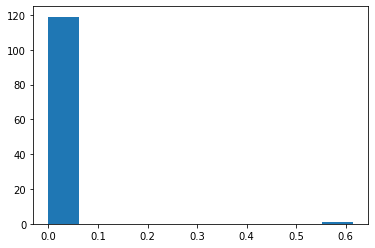

In [ ]:
plt.hist(df_na_treat['category_code'].value_counts(1).values)

In [ ]:
df_na_treat['category_code'].nunique()

120

In [ ]:
# 카테고리 파싱 (카테고리 단위별로 변수화)
df_na_treat[['ctgr_lv1','ctgr_lv2','ctgr_lv3','ctgr_lv4']] = df_na_treat['category_code'].str.split('.',expand= True)

c:\python 3.8\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_na_treat.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,ctgr_lv1,ctgr_lv2,ctgr_lv3,ctgr_lv4
0,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone,None,None
1,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,smartphone,None,None
3,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,furniture,bathroom,toilet,None
4,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,electronics,audio,headphone,None
5,2019-10-01 00:09:54 UTC,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,audio,headphone,None


In [ ]:
pd.concat([df_na_treat['ctgr_lv1'].value_counts(),df_na_treat['ctgr_lv1'].value_counts(1)], axis =1)

,ctgr_lv1,ctgr_lv1
electronics,420361,0.764978
appliances,71231,0.129627
computers,27151,0.049410
auto,7869,0.014320
apparel,6152,0.011195
construction,5439,0.009898
kids,4529,0.008242
furniture,3828,0.006966
accessories,1432,0.002606
sport,1029,0.001873


#### electronics, appliances 는 2번째 카테고리까지 가보자

In [ ]:
pd.concat([df_na_treat[df_na_treat.ctgr_lv1 == 'electronics']['ctgr_lv2'].value_counts(),df_na_treat[df_na_treat.ctgr_lv1 == 'electronics']['ctgr_lv2'].value_counts(1)], axis =1)

,ctgr_lv2,ctgr_lv2
smartphone,337575,0.803060
audio,34653,0.082436
video,21630,0.051456
clocks,16647,0.039602
tablet,5599,0.013320
telephone,3733,0.008880
camera,524,0.001247


In [ ]:
0.764978*0.803060
# 카테고리 3까지 가보자

0.61432323268

In [ ]:
pd.concat([df_na_treat.loc[(df_na_treat.ctgr_lv1 =="electronics")&(df_na_treat.ctgr_lv2 =="smartphone") ,['brand']].value_counts(), 
df_na_treat.loc[(df_na_treat.ctgr_lv1 =="electronics")&(df_na_treat.ctgr_lv2 =="smartphone") ,['brand']].value_counts(normalize=True)], axis = 1)

,0,1
brand,,
samsung,143123,0.423974
apple,115345,0.341687
xiaomi,38776,0.114866
huawei,21882,0.064821
oppo,10891,0.032262
vivo,2025,0.005999
meizu,1686,0.004994
honor,555,0.001644
nokia,512,0.001517


In [ ]:
0.764978*0.803060*0.423

0.25985872742363997

In [ ]:
pd.concat([df_na_treat[df_na_treat.ctgr_lv2 == 'smartphone']['ctgr_lv4'].value_counts(),df_na_treat[df_na_treat.ctgr_lv2 == 'smartphone']['ctgr_lv4'].value_counts(1)], axis =1)
# 4까지 나눌수는 없음

,ctgr_lv4,ctgr_lv4


[결론1]  
- 스마트폰은 삼성/애플/기타 로 묶자!

In [ ]:
# 대카테고리 'appliances' 값 확인 
pd.concat([df_na_treat.loc[df_na_treat.ctgr_lv1 =="appliances",['ctgr_lv2']].value_counts(),
          df_na_treat.loc[df_na_treat.ctgr_lv1 =="appliances",['ctgr_lv2']].value_counts(normalize=True)], axis= 1)
# appliances 는 중카테고리의 수가 작아 appliances 단일로 분석하는것이 좋을것으로 판단됨

,0,1
ctgr_lv2,,
kitchen,45057,0.632548
environment,17437,0.244795
iron,3647,0.051200
personal,2493,0.034999
sewing_machine,1939,0.027221
ironing_board,658,0.009238


In [ ]:
0.129627*0.632548
# 굳이 나누면 kitchen과 그 외, 로 나눌 수 있는데, 중 카테고리 수가 적으나 "카테고리1"로 가자

0.081995299596

[결론1]  
- 스마트폰은 삼성/애플/기타 로 묶자!  
- appliances은 단일 카테고리로 가자(이유: 2카테고리 수가 적음)

### 데이터 고객기준으로 변경  
- transaction단위 > user 단위

In [ ]:
df_na_treat.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,ctgr_lv1,ctgr_lv2,ctgr_lv3,ctgr_lv4
0,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone,None,None
1,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,smartphone,None,None
3,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,furniture,bathroom,toilet,None
4,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,electronics,audio,headphone,None
5,2019-10-01 00:09:54 UTC,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,audio,headphone,None


In [ ]:
df_na_treat.groupby('user_id')['event_time'].count()

user_id
303160429    1
340041246    1
384989212    1
401021311    1
403013066    2
            ..
566265448    1
566267483    2
566270060    2
566274637    1
566278294    1
Name: event_time, Length: 263445, dtype: int64

In [ ]:
user_by_ctgr_cnt = df_na_treat.groupby('user_id')['event_time'].count().to_frame()

In [ ]:
user_by_ctgr_cnt.columns = ['pur_cnt']

In [ ]:
user_by_ctgr_cnt

,pur_cnt
user_id,
303160429,1
340041246,1
384989212,1
401021311,1
403013066,2
...,...
566265448,1
566267483,2
566270060,2


In [ ]:
# 유저별 전략 카테고리 값 요약  
smartphone_samsung =  df_na_treat[(df_na_treat.ctgr_lv1 == 'electronics') & (df_na_treat.ctgr_lv2 == 'smartphone') & (df_na_treat.brand == 'samsung')].groupby('user_id')['brand'].count()
smartphone_apple =  df_na_treat[(df_na_treat.ctgr_lv1 == 'electronics') & (df_na_treat.ctgr_lv2 == 'smartphone') & (df_na_treat.brand == 'apple')].groupby('user_id')['brand'].count()
smartphone_ect =  df_na_treat[(df_na_treat.ctgr_lv1 == 'electronics') & (df_na_treat.ctgr_lv2 == 'smartphone') & ~(df_na_treat.brand == 'samsung') & ~(df_na_treat.brand == 'apple')].groupby('user_id')['brand'].count()
electronics = df_na_treat[(df_na_treat.ctgr_lv1 == 'electronics') & ~(df_na_treat.ctgr_lv2 == 'smartphone')].groupby('user_id')['brand'].count()
appliances = df_na_treat[(df_na_treat.ctgr_lv1 == 'appliances')].groupby('user_id')['brand'].count()
ect = df_na_treat[~((df_na_treat.ctgr_lv1 == 'electronics') | (df_na_treat.ctgr_lv1 == 'appliances'))].groupby('user_id')['brand'].count()

In [ ]:
smartphone_samsung = smartphone_samsung.to_frame().reset_index().rename(columns = {'brand':'smartphone_samsung'})
smartphone_apple = smartphone_apple.to_frame().reset_index().rename(columns = {'brand': 'smartphone_apple'})
smartphone_ect = smartphone_ect.to_frame().reset_index().rename(columns = {'brand' : 'smartphone_ect'})
electronics = electronics.to_frame().reset_index().rename(columns = {'brand': 'electronics'})
appliances = appliances.to_frame().reset_index().rename(columns ={'brand' : 'appliances'})
ect = ect.to_frame().reset_index().rename(columns = {'brand' :'etc'})

In [ ]:
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,smartphone_samsung, how ='left', on = 'user_id' )
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,smartphone_apple, how ='left', on = 'user_id' )
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,smartphone_ect, how ='left', on = 'user_id' )
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,electronics, how ='left', on = 'user_id' )
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,appliances, how ='left', on = 'user_id' )
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,ect, how ='left', on = 'user_id' )

In [ ]:
user_by_ctgr_cnt.head()

,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
0,303160429,1,NaN,NaN,NaN,1.0,NaN,NaN
1,340041246,1,NaN,NaN,NaN,1.0,NaN,NaN
2,384989212,1,NaN,NaN,NaN,NaN,1.0,NaN
3,401021311,1,NaN,NaN,NaN,1.0,NaN,NaN
4,403013066,2,1.0,1.0,NaN,NaN,NaN,NaN


In [ ]:
user_by_ctgr_cnt.fillna(0,inplace= True)
user_by_ctgr_cnt.head()

,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
0,303160429,1,0.0,0.0,0.0,1.0,0.0,0.0
1,340041246,1,0.0,0.0,0.0,1.0,0.0,0.0
2,384989212,1,0.0,0.0,0.0,0.0,1.0,0.0
3,401021311,1,0.0,0.0,0.0,1.0,0.0,0.0
4,403013066,2,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
user_by_ctgr_cnt.shape

(263445, 8)

#####  생성한 전략 카테고리 비중 확인하기

In [ ]:
t = user_by_ctgr_cnt.iloc[:,2:8].stack().to_frame()

In [ ]:
t.reset_index(inplace=True)
t

,level_0,level_1,0
0,0,smartphone_samsung,0.0
1,0,smartphone_apple,0.0
2,0,smartphone_ect,0.0
3,0,electronics,1.0
4,0,appliances,0.0
...,...,...,...
1580665,263444,smartphone_apple,1.0
1580666,263444,smartphone_ect,0.0
1580667,263444,electronics,0.0
1580668,263444,appliances,0.0


In [ ]:
t.columns=['idx','cat','cnt']

In [ ]:
t[t.cnt == 1]['cat'].value_counts(1)

smartphone_samsung    0.240518
electronics           0.164604
appliances            0.162273
smartphone_apple      0.155736
smartphone_ect        0.153478
etc                   0.123392
Name: cat, dtype: float64

### 이상치 확인

In [ ]:
user_by_ctgr_cnt.describe()
# max에서 극단값 확인!

,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
count,2.634450e+05,263445.000000,263445.000000,263445.000000,263445.000000,263445.000000,263445.000000,263445.000000
mean,5.366641e+08,2.085851,0.543275,0.437833,0.300279,0.314244,0.270383,0.219837
std,1.855121e+07,3.618213,1.889915,1.894715,1.178621,1.298420,0.914654,0.914932
min,3.031604e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.175192e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.365856e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.555559e+08,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.662783e+08,322.000000,192.000000,183.000000,154.000000,272.000000,71.000000,65.000000


In [ ]:
# 예측: 구매건수가 너무 많은 이상치는 공동구매나 단체 주문일듯

(0.0, 10.0)

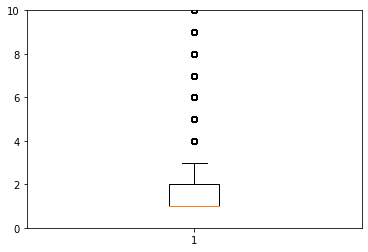

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(user_by_ctgr_cnt['pur_cnt'])
ax.set_ylim(0,10)

In [ ]:
user_by_ctgr_cnt[user_by_ctgr_cnt.pur_cnt > 50].head()

,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
488,512372673,55,0.0,2.0,0.0,53.0,0.0,0.0
798,512382879,60,39.0,2.0,10.0,9.0,0.0,0.0
893,512386086,322,105.0,67.0,1.0,87.0,61.0,1.0
1519,512409624,69,0.0,69.0,0.0,0.0,0.0,0.0
3896,512511358,110,0.0,106.0,0.0,0.0,2.0,2.0


In [ ]:
# IQR활용
IQR = user_by_ctgr_cnt.pur_cnt.quantile(0.75) - user_by_ctgr_cnt.pur_cnt.quantile(0.25)

In [ ]:
user_by_ctgr_cnt.pur_cnt.quantile(0.75) + IQR * 0.5

2.5

In [ ]:
# 상위1%
user_by_ctgr_cnt.pur_cnt.quantile(0.99)

14.0

In [ ]:
user_by_ctgr_cnt[user_by_ctgr_cnt.pur_cnt >=14].count()[0]

3013

In [ ]:
# 3/6 시그마
mm = user_by_ctgr_cnt.pur_cnt.mean()
std =  user_by_ctgr_cnt.pur_cnt.std()
print(mm + std*3,mm + std*6)

12.940488868670593 23.795126800713046


In [ ]:
user_by_ctgr_cnt[user_by_ctgr_cnt.pur_cnt >=mm + std*3].count()[0]

3478

In [ ]:
user_by_ctgr_cnt[user_by_ctgr_cnt.pur_cnt >=mm + std*6].count()[0]

1018

In [ ]:
# 이상치 판단 기준 (정리)

user_by_ctgr_cnt[user_by_ctgr_cnt['pur_cnt']>= 50]['user_id'].count()

print("표준편차 :", user_by_ctgr_cnt['pur_cnt'].std())
print("99분위수 :", user_by_ctgr_cnt['pur_cnt'].quantile(q =0.99), ", 대상자수 : ",user_by_ctgr_cnt[user_by_ctgr_cnt['pur_cnt']>= 14]['user_id'].count())
print("3시그마 :", (user_by_ctgr_cnt['pur_cnt'].mean()) + (user_by_ctgr_cnt['pur_cnt'].std()*3), ", 대상자수 : ",user_by_ctgr_cnt[user_by_ctgr_cnt['pur_cnt']>= 13]['user_id'].count())
print("6시그마 :", (user_by_ctgr_cnt['pur_cnt'].mean()) + (user_by_ctgr_cnt['pur_cnt'].std()*6), ", 대상자수 : ",user_by_ctgr_cnt[user_by_ctgr_cnt['pur_cnt']>= 23]['user_id'].count())
# 99분위수 확인  14  (14개 이상은 주문은 이상치로 간주하기로함)

표준편차 : 3.618212644014151
99분위수 : 14.0 , 대상자수 :  3013
3시그마 : 12.940488868670593 , 대상자수 :  3478
6시그마 : 23.795126800713046 , 대상자수 :  1115


In [ ]:
df_train_data = user_by_ctgr_cnt[(user_by_ctgr_cnt.pur_cnt < 14)] # 상위 1%기준으로 이상치 삭제
print(df_train_data.shape)
df_train_data.describe()

(260432, 8)


,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
count,2.604320e+05,260432.000000,260432.000000,260432.000000,260432.000000,260432.000000,260432.000000,260432.000000
mean,5.366739e+08,1.817841,0.464601,0.356784,0.266023,0.277366,0.253828,0.199238
std,1.855710e+07,1.659568,1.022210,1.002537,0.768920,0.781203,0.697226,0.653681
min,3.031604e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.175314e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.365809e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.555716e+08,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.662783e+08,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000


In [ ]:
### 이상치 제거 후 : df_train_data
### 이상치 제거 전 : user_by_ctgr_cnt

<AxesSubplot:>

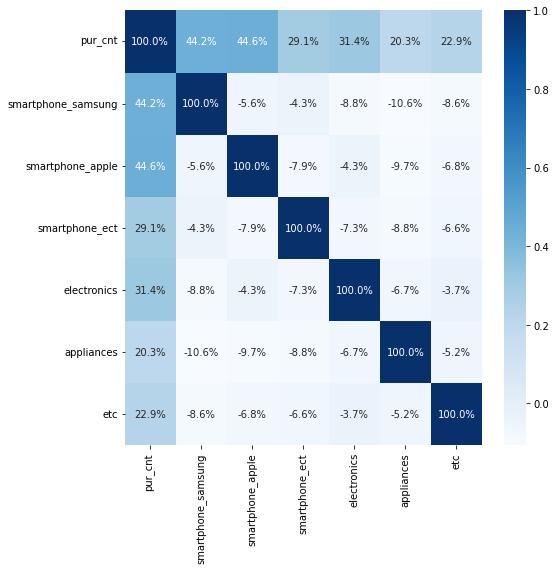

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(df_train_data[['pur_cnt','smartphone_samsung','smartphone_apple','smartphone_ect','electronics','appliances','etc']].corr()
           , annot = True, cmap = 'Blues', fmt = '.1%')

<AxesSubplot:>

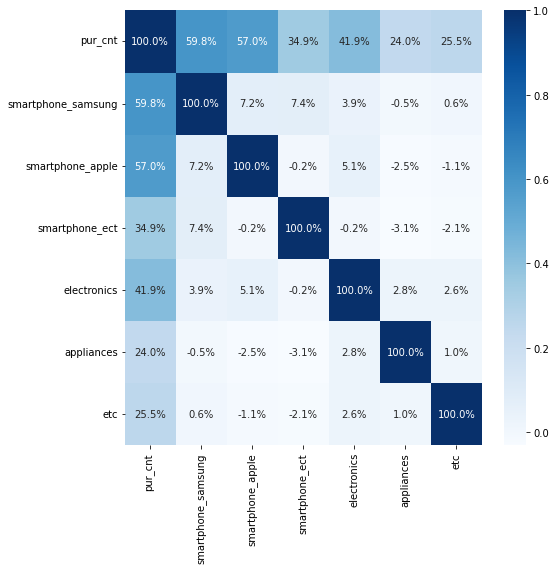

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(user_by_ctgr_cnt[['pur_cnt','smartphone_samsung','smartphone_apple','smartphone_ect','electronics','appliances','etc']].corr()
           , annot = True, cmap = 'Blues', fmt = '.1%')

###### smartphone과 구매건수와의 상관관계가 높음

In [ ]:
gc.collect()

36

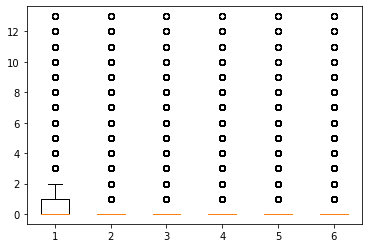

In [ ]:
# 각 전략 카테고리별 구매건수 확인 
fig, ax = plt.subplots()
ax.boxplot([df_train_data['smartphone_samsung'], df_train_data['smartphone_apple'], df_train_data['smartphone_ect'], df_train_data['electronics'], df_train_data['appliances'],df_train_data['etc']])
# ax.set_ylim (-1,20)
plt.show()

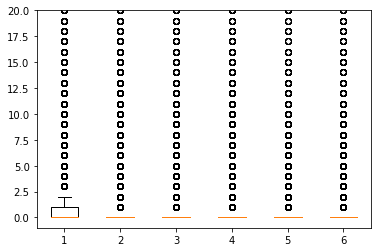

In [ ]:
# 각 전략 카테고리별 구매건수 확인 
fig, ax = plt.subplots()
ax.boxplot([user_by_ctgr_cnt['smartphone_samsung'], user_by_ctgr_cnt['smartphone_apple'], user_by_ctgr_cnt['smartphone_ect'], user_by_ctgr_cnt['electronics'], user_by_ctgr_cnt['appliances'],user_by_ctgr_cnt['etc']])
ax.set_ylim (-1,20)
plt.show()

### 군집화

In [ ]:
df_train_data = df_train_data.reset_index(drop = True).copy()

In [ ]:
df_train_data

,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
0,303160429,1,0.0,0.0,0.0,1.0,0.0,0.0
1,340041246,1,0.0,0.0,0.0,1.0,0.0,0.0
2,384989212,1,0.0,0.0,0.0,0.0,1.0,0.0
3,401021311,1,0.0,0.0,0.0,1.0,0.0,0.0
4,403013066,2,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
260427,566265448,1,0.0,0.0,0.0,1.0,0.0,0.0
260428,566267483,2,0.0,0.0,0.0,0.0,0.0,2.0
260429,566270060,2,1.0,0.0,0.0,0.0,1.0,0.0
260430,566274637,1,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_train_data.describe()

,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
count,2.604320e+05,260432.000000,260432.000000,260432.000000,260432.000000,260432.000000,260432.000000,260432.000000
mean,5.366739e+08,1.817841,0.464601,0.356784,0.266023,0.277366,0.253828,0.199238
std,1.855710e+07,1.659568,1.022210,1.002537,0.768920,0.781203,0.697226,0.653681
min,3.031604e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.175314e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.365809e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.555716e+08,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.662783e+08,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000


##### 숫자형 변수 
- 표준화(평균, 표준편차 이용) e.g. standardScaler, RobustScaler
- 정규화(0~1사이 값으로! min, max값 영향 받는다)  
> 여기서는 앞서 이상치를 제거 했으니, 표준화로 가자! 뭐가 좋을지는 시도해봐야한다.  
표준화하고 정규화 할지,,둘 중 하나만 할지,,

#### 변수의 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df_train_data.iloc[:,2:])

StandardScaler()

In [ ]:
np_train_scaled = scaler.transform(df_train_data.iloc[:,2:])

In [ ]:
np_train_scaled

array([[-0.45450754, -0.35588177, -0.34597089,  0.92502851, -0.36405533,
        -0.30479472],
       [-0.45450754, -0.35588177, -0.34597089,  0.92502851, -0.36405533,
        -0.30479472],
       [-0.45450754, -0.35588177, -0.34597089, -0.35505048,  1.07020317,
        -0.30479472],
       ...,
       [ 0.52376719, -0.35588177, -0.34597089, -0.35505048,  1.07020317,
        -0.30479472],
       [-0.45450754,  0.64158913, -0.34597089, -0.35505048, -0.36405533,
        -0.30479472],
       [-0.45450754,  0.64158913, -0.34597089, -0.35505048, -0.36405533,
        -0.30479472]])

#### 군집화 알고리즘 적용(K-means)  
: 군집화 알고리즘의 input은 array형태!

c:\python 3.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='smartphone_samsung', ylabel='Density'>

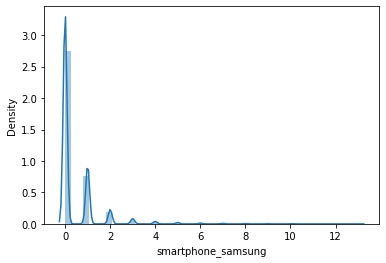

In [ ]:
sns.distplot(df_train_data['smartphone_samsung'])

In [ ]:
scaler_frame = df_train_data[['user_id','pur_cnt']]

In [ ]:
scale_cols = df_train_data.iloc[:,2:].columns.tolist()

In [ ]:
scaler_frame[scale_cols] = scaler.fit_transform(df_train_data.iloc[:,2:])

c:\python 3.8\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
scaler_frame.head()

,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
0,303160429,1,-0.454508,-0.355882,-0.345971,0.925029,-0.364055,-0.304795
1,340041246,1,-0.454508,-0.355882,-0.345971,0.925029,-0.364055,-0.304795
2,384989212,1,-0.454508,-0.355882,-0.345971,-0.355050,1.070203,-0.304795
3,401021311,1,-0.454508,-0.355882,-0.345971,0.925029,-0.364055,-0.304795
4,403013066,2,0.523767,0.641589,-0.345971,-0.355050,-0.364055,-0.304795


In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

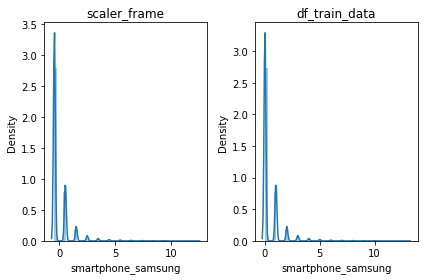

In [ ]:
# fig = plt.figure()
plt.subplot(1, 2, 1)
plt.title('scaler_frame')
sns.distplot(scaler_frame['smartphone_samsung'])

plt.subplot(1, 2, 2) 
plt.title('df_train_data')
sns.distplot(df_train_data['smartphone_samsung'])
plt.tight_layout()
plt.show()

In [ ]:
gc.collect()

20746

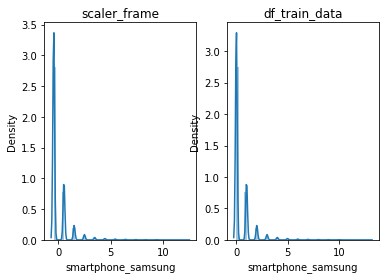

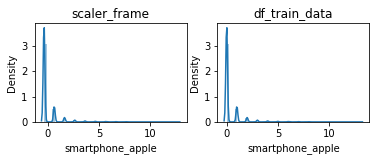

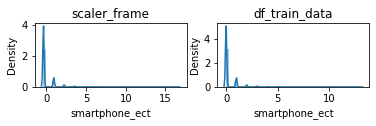

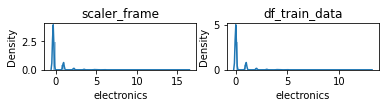

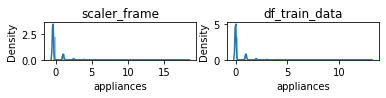

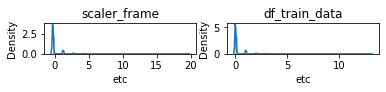

In [ ]:
for i in range(2,scaler_frame.shape[1]):
    plt.subplot(i-1, 2, 1)
    plt.title('scaler_frame')
    sns.distplot(scaler_frame.iloc[:,i])

    plt.subplot(i-1, 2, 2) 
    plt.title('df_train_data')
    sns.distplot(df_train_data.iloc[:,i])
#     plt.tight_layout()
    plt.show()

#### 군집화 알고리즘 적용(k- means clustering)

In [ ]:
kmeans = KMeans(n_clusters = 5)

In [ ]:
y_pred = kmeans.fit_predict(np_train_scaled)

In [ ]:
 kmeans.fit(np_train_scaled) # fit은 학습 모델, fit_predict하면 군집번호

KMeans(n_clusters=5)

In [ ]:
y_pred

array([0, 0, 4, ..., 4, 0, 0])

In [ ]:
np_train_scaled

array([[-0.45450754, -0.35588177, -0.34597089,  0.92502851, -0.36405533,
        -0.30479472],
       [-0.45450754, -0.35588177, -0.34597089,  0.92502851, -0.36405533,
        -0.30479472],
       [-0.45450754, -0.35588177, -0.34597089, -0.35505048,  1.07020317,
        -0.30479472],
       ...,
       [ 0.52376719, -0.35588177, -0.34597089, -0.35505048,  1.07020317,
        -0.30479472],
       [-0.45450754,  0.64158913, -0.34597089, -0.35505048, -0.36405533,
        -0.30479472],
       [-0.45450754,  0.64158913, -0.34597089, -0.35505048, -0.36405533,
        -0.30479472]])

In [ ]:
kmeans.inertia_

930455.6256066608

In [ ]:
kmeans.cluster_centers_

array([[-0.01948335, -0.1570635 ,  0.16549359,  0.14039493, -0.35754279,
        -0.29960189],
       [-0.38229625, -0.31581978, -0.2806195 , -0.22240925, -0.28129712,
         1.9709315 ],
       [-0.26484028,  2.94330191, -0.25954699, -0.13500076, -0.30410993,
        -0.23176022],
       [ 3.85403796, -0.12869978,  0.0354484 , -0.13732718, -0.23329972,
        -0.19190907],
       [-0.38735871, -0.32789395, -0.29796411, -0.26162322,  1.70994485,
        -0.27924026]])

##### 최적의  cluster갯수 찾기
1) elbow plot  
: 이너셔(inertia)를 사용. 
2) siluette score(연산 많음)  
** inertia  
: 각 중심점에서 군집의 데이터간의 거리를 합산  
: 군집의 응집도를 의미(작을수록 군집화 good)

In [ ]:
# 1) elbow plot 

In [ ]:
# 최적의  cluster갯수 찾기
kmeans_per_k = [KMeans(n_clusters = i).fit(np_train_scaled) for i in range(1,10)]
inertias= [mdl.inertia_ for mdl in kmeans_per_k]

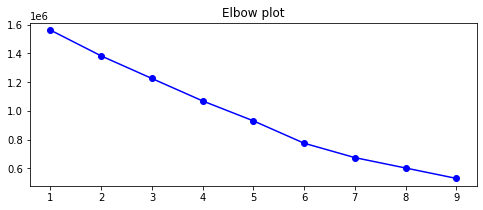

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(range(1,10), inertias,"bo-")
plt.title("Elbow plot")
plt.show()

In [ ]:
gc.collect()

281

In [ ]:
# Silhouette score
from sklearn.metrics import silhouette_score

In [ ]:
# silhouette_score_k = [KMeans(n_clusters = i).fit_predict(np_train_scaled) for i in range(5,10)]

In [ ]:
# silhouette_score(np_train_scaled, silhouette_score_k[0] )

#### 군집생성 및 군집별 특성 확인  
: 군집별로 각 변수가 어떤 특성을 가진 애들끼지 모인 건지 확인! => "취향"을 찾는다!

In [ ]:
kmeans = KMeans(n_clusters = 8, random_state=4321)
y_pred = kmeans.fit_predict(np_train_scaled)

In [ ]:
df_train_data['clst_k8'] = y_pred

In [ ]:
df_train_data.head()

,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc,clst_k8
0,303160429,1,0.0,0.0,0.0,1.0,0.0,0.0,7
1,340041246,1,0.0,0.0,0.0,1.0,0.0,0.0,7
2,384989212,1,0.0,0.0,0.0,0.0,1.0,0.0,6
3,401021311,1,0.0,0.0,0.0,1.0,0.0,0.0,7
4,403013066,2,1.0,1.0,0.0,0.0,0.0,0.0,1


In [ ]:
df_train_data['clst_k8'].value_counts(1)

1    0.334448
3    0.155208
7    0.153998
6    0.152500
0    0.121026
5    0.035829
2    0.031843
4    0.015148
Name: clst_k8, dtype: float64

In [ ]:
df_train_data.iloc[:,2:7].columns.tolist()

['smartphone_samsung',
 'smartphone_apple',
 'smartphone_ect',
 'electronics',
 'appliances']

In [ ]:
df_train_data.groupby('clst_k8').agg(
    uu = ('user_id','count'),
    avg_pur_cnt = ('pur_cnt','mean'),
    smartphone_samsung_avg = ('smartphone_samsung','mean'),
    smartphone_apple_avg = ('smartphone_apple','mean'),
    smartphone_ect_avg = ('smartphone_ect','mean'),
    electronics_avg = ('electronics','mean'),
    appliances_avg = ('appliances','mean'),
    etc_avg = ('etc','mean')

)

,uu,avg_pur_cnt,smartphone_samsung_avg,smartphone_apple_avg,smartphone_ect_avg,electronics_avg,appliances_avg,etc_avg
clst_k8,,,,,,,,
0,31519,1.747422,0.061233,0.051810,0.035122,0.072401,0.025350,1.501507
1,87101,1.267793,0.753103,0.497319,0.008025,0.006027,0.000517,0.002801
2,8293,5.288074,0.252140,4.668033,0.074280,0.180152,0.050163,0.063306
3,40421,1.778853,0.108137,0.046189,1.554910,0.044704,0.012667,0.012246
4,3945,4.845120,0.201774,0.100887,0.092522,0.194677,4.117110,0.138150
5,9331,5.145108,4.419784,0.231058,0.208123,0.128068,0.086700,0.071375
6,39716,1.361592,0.057785,0.032607,0.027118,0.041923,1.171493,0.030668
7,40106,1.769411,0.066748,0.088266,0.015559,1.558345,0.018825,0.021668


|제목|내용|comment|수정후|
|------|---|---|---|
|0 |	기타 선호 집단| |기타 상품 소회 구매집단|
|1	|삼성 스마트폰 선호 집단(평균 구매건수가 낮음)| |스마트폰 단건 구매집단|
|2	|애플 스마트폰 선호 집단/ 평균구매건수가 높음| 좀더 이해하기 쉽게 하면?|애플폰 다회구매 집단|
|3	|삼성,애플이 아닌 스마트폰 선호 집단|| 기타 스마트폰 소회 구매집단 |
|4	|평균 구매건수가 높은 가전제품 선호집단||소형 가전제품 다회 구매집단|
|5	|삼성스마트폰 선호 집단(평균 구매건수가 높음)||삼성폰 다회구매 집단|
|6	|평균구매건수가 작은 가전제품 선호 집단|좀더 이해하기 쉽게하면? |가전제품 단건 구매집단|
|7	|전자기기 선호 집단	|				


#### 군집화할 때, 유의사항 및 tip!!
1) elbow plot이나 silhouette score보고 군집을 여러개 먼저 그려보고 
-> 줄여가면서 특성 잘 잡히는지 보기  
2) 군집별 비율은 최소 5%이상!  
3) 군집화에 대한 절대적인 지표는 없어서, 실루엣계수나 scatter plot, 취향 등을 보고 정해야 함!